[-0.10015, 0.01461, 0.99631, 0.99719, 0.9964, 0.9887, 0.98716, 0.99699]
Radius: 0.8298
[[Model]]
    Model(float_rational)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 28
    # data points      = 85
    # variables        = 8
    chi-square         = 29.1445704
    reduced chi-square = 0.37850091
    Akaike info crit   = -74.9825231
    Bayesian info crit = -55.4413131
[[Variables]]
    c1:  -0.10015327 +/- 0.05056094 (50.48%) (init = -0.1)
    c2:   0.01460599 +/- 0.05721400 (391.72%) (init = 0.014)
    ns1:  0.99631465 +/- 0.00236159 (0.24%) (init = 1)
    ns2:  0.99719401 +/- 0.00183769 (0.18%) (init = 1)
    nr:   0.99639764 +/- 0.00163330 (0.16%) (init = 1)
    nb1:  0.98870200 +/- 0.00198412 (0.20%) (init = 1)
    nb2:  0.98715582 +/- 0.00217674 (0.22%) (init = 1)
    nm:   0.99699310 +/- 0.00190540 (0.19%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(c1, c2)   =  0.999
    C(ns2, nb1) =  0.857
    C(nb1, nb2) =  0.836
  

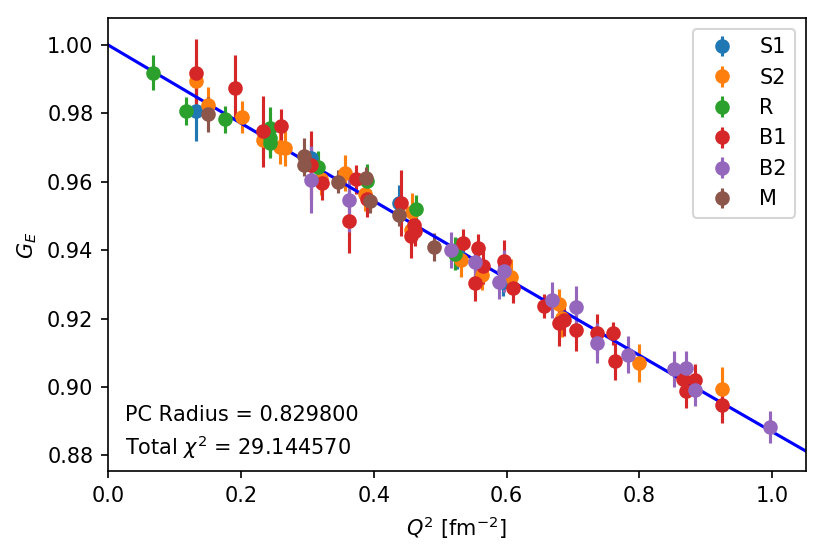

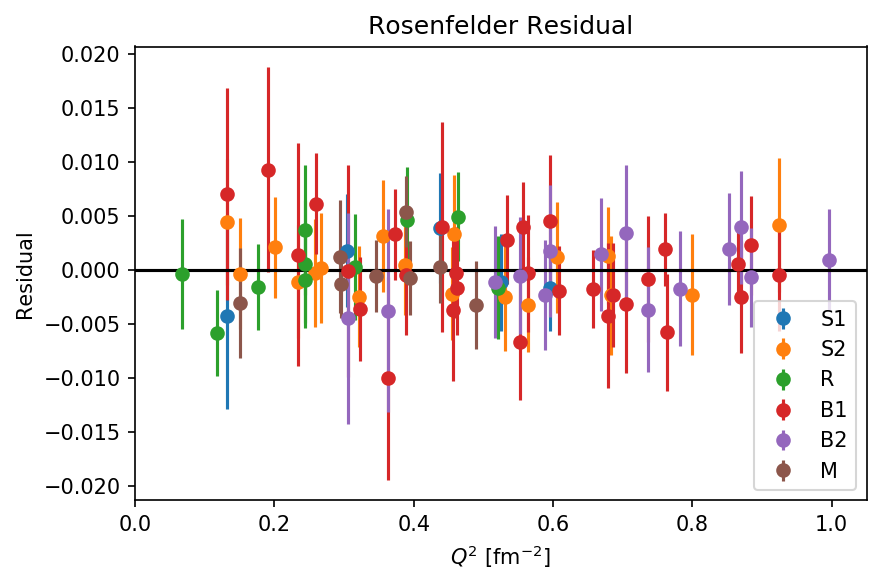

In [15]:
#Graph First Time
%matplotlib inline

##Import Packages
import matplotlib.pyplot as plt
import numpy as np
from lmfit import Model, Parameters
import random

#Float Function for Modeling/Regression
def normal_float(Q2,ns1,ns2,nr,nb1,nb2,nm,c1):
    f1= ns1*((1+(S1[0:,0]/c1))**Power)
    f2= ns2*((1+(S2[0:,0]/c1))**Power)
    f3=  nr*((1+(R[0:,0]/c1))**Power)
    f4= nb1*((1+(B1[0:,0]/c1))**Power)
    f5= nb2*((1+(B2[0:,0]/c1))**Power)
    f6=  nm*((1+(M[0:,0]/c1))**Power)
    return np.concatenate((f1,f2,f3,f4,f5,f6))
def float_multiply(Q2,ns1,ns2,nr,nb1,nb2,nm,c1):
    f1= ns1*((1+(S1[0:,0]*c1))**Power)
    f2= ns2*((1+(S2[0:,0]*c1))**Power)
    f3=  nr*((1+(R[0:,0]*c1))**Power)
    f4= nb1*((1+(B1[0:,0]*c1))**Power)
    f5= nb2*((1+(B2[0:,0]*c1))**Power)
    f6=  nm*((1+(M[0:,0]*c1))**Power)
    return np.concatenate((f1,f2,f3,f4,f5,f6))
def float_1Param(Q2,c1,norm):
    F= norm*(1+Q2/c1)**Power
    return np.array((F))
def float_rational(Q2,ns1,ns2,nr,nb1,nb2,nm,c1,c2):
    f1= ns1*((1+(S1[0:,0]*c1))/(1+(S1[0:,0]*c2)))
    f2= ns2*((1+(S2[0:,0]*c1))/(1+(S2[0:,0]*c2)))
    f3=  nr*((1+(R[0:,0]*c1))/(1+(R[0:,0]*c2)))
    f4= nb1*((1+(B1[0:,0]*c1))/(1+(B1[0:,0]*c2)))
    f5= nb2*((1+(B2[0:,0]*c1))/(1+(B2[0:,0]*c2)))
    f6=  nm*((1+(M[0:,0]*c1))/(1+(M[0:,0]*c2)))
    return np.concatenate((f1,f2,f3,f4,f5,f6))
def NEW_float_rational(Q2,norm,c1,c2):
    F=norm*((1+(Q2*c1))/(1+(Q2*c2)))
    return np.array((F))

##Import Data Files
S1=np.loadtxt('+S1sort.dat')
S2=np.loadtxt('+S2sort.dat')
R =np.loadtxt('+Rsort.dat' )
B1=np.loadtxt('+B1sort.dat')
B2=np.loadtxt('+B2sort.dat')
M =np.loadtxt('+Msort.dat' )

############################################################################
##User Input
#Power
Power=-1
#Function (normal_float,float_multiply, or float_1Param)
Function=float_rational
#Coulomb Corrections (1 or 0)
C_Corr=0
############################################################################

Full_Param_Data=[]
##Generate Values
Q2=(np.concatenate((S1[0:,0],S2[0:,0],R[0:,0],B1[0:,0],B2[0:,0],M[0:,0])))
GE=np.concatenate((S1[0:,1],S2[0:,1],R[0:,1],B1[0:,1],B2[0:,1],M[0:,1]))
Error=np.concatenate((S1[0:,2],S2[0:,2],R[0:,2],B1[0:,2],B2[0:,2],M[0:,2]))
#Coulomb Correction
if C_Corr==1:
    coulomb_corr=np.concatenate((S1[0:,3],S2[0:,3],R[0:,3],B1[0:,3],B2[0:,3],M[0:,3]))
    GE=GE-coulomb_corr
                          
##Regression
#Parameters
params = Parameters()
params.add('c1',  value=-0.10,vary=1)
if Function==float_rational or Function==NEW_float_rational:
    params.add('c2', value=0.014,vary=1)
if Function==float_1Param or Function==NEW_float_rational:
    params.add('norm',value=1,vary=1)
elif Function!=float_1Param or Function!=NEW_float_rational:
    params.add('ns1', value=1,vary=1)
    params.add('ns2', value=1,vary=1)
    params.add('nr',  value=1,vary=1)
    params.add('nb1', value=1,vary=1)
    params.add('nb2', value=1,vary=1)
    params.add('nm',  value=1,vary=1)

#Result
model=Model(Function)
result=model.fit(GE,Q2=Q2,params=params,weights=1/Error)
#Save Params to List
Real_Params=[]
for name, par in result.params.items():
    Param=round(par.value,5)
    Real_Params.append(Param)
print(Real_Params)
##Fit Report
if Function==float_multiply:
    print('Radius:',round((((-6*np.abs(Power)*Real_Params[0])**2)**0.25),5))
elif Function==float_rational or Function==NEW_float_rational:
    print('Radius:',round((((6*(Real_Params[1]-Real_Params[0]))**2)**0.25),5))
else:
    print('Radius:',round((((6*np.abs(Power)/Real_Params[0])**2)**0.25),5))

#Report
print(result.fit_report())

##Plot
#Formatting
plt.figure(dpi=150)
#plt.title('$Q^2$ vs $G_E$: Function vs Data Points')
plt.xlabel('$Q^2$ [fm$^{-2}$]')
plt.ylabel('$G_E$')
plt.xlim(0,1.05)

#Scatter Plot with Error Bars
#Initialize
if Function==float_multiply:
    plt.annotate('PC Radius = %f'%round((((-6*np.abs(Power)*Real_Params[0])**2)**0.25),5),xy=(0.025,0.89))
elif Function==float_rational or Function==NEW_float_rational:
    plt.annotate('PC Radius = %f'%round((((6*(Real_Params[1]-Real_Params[0]))**2)**0.25),5),xy=(0.025,0.89))
else:
    plt.annotate('PC Radius = %f'%round((((6*np.abs(Power)/Real_Params[0])**2)**0.25),5),xy=(0.025,0.89))

plt.annotate('Total $\chi^2$ = %f'%result.chisqr,xy=(0.025,0.88))

#Plot Error Bars
Adjust=0
if Function==float_1Param:
    plt.errorbar(Q2,GE/Real_Params[1],yerr=Error,fmt='o',label='All')
elif Function==NEW_float_rational:
    plt.errorbar(Q2,GE/Real_Params[2],yerr=Error,fmt='o',label='All')
elif Function==float_rational:
    #With CC
    if C_Corr==1:
        plt.errorbar(S1[:,0],(S1[:,1]-S1[:,3])/Real_Params[2],yerr=S1[:,2],fmt='o',label='S1')
        plt.errorbar(S2[:,0],(S2[:,1]-S2[:,3])/Real_Params[3],yerr=S2[:,2],fmt='o',label='S2')
        plt.errorbar(R[:,0],(R[:,1]-R[:,3])/Real_Params[4],yerr=R[:,2],fmt='o',label='R')
        plt.errorbar(B1[:,0],(B1[:,1]-B1[:,3])/Real_Params[5],yerr=B1[:,2],fmt='o',label='B1')
        plt.errorbar(B2[:,0],(B2[:,1]-B2[:,3])/Real_Params[6],yerr=B2[:,2],fmt='o',label='B2')
        plt.errorbar(M[:,0],(M[:,1]-M[:,3])/Real_Params[7],yerr=M[:,2],fmt='o',label='M')
    #Without CC
    else:
        plt.errorbar(S1[:,0],S1[:,1]/Real_Params[2],yerr=S1[:,2],fmt='o',label='S1')
        plt.errorbar(S2[:,0],S2[:,1]/Real_Params[3],yerr=S2[:,2],fmt='o',label='S2')
        plt.errorbar(R[:,0],R[:,1]/Real_Params[4],yerr=R[:,2],fmt='o',label='R')
        plt.errorbar(B1[:,0],B1[:,1]/Real_Params[5],yerr=B1[:,2],fmt='o',label='B1')
        plt.errorbar(B2[:,0],B2[:,1]/Real_Params[6],yerr=B2[:,2],fmt='o',label='B2')
        plt.errorbar(M[:,0],M[:,1]/Real_Params[7],yerr=M[:,2],fmt='o',label='M')
else:        
    #With CC
    if C_Corr==1:
        plt.errorbar(S1[:,0],(S1[:,1]-S1[:,3])/Real_Params[1],yerr=S1[:,2],fmt='o',label='S1')
        plt.errorbar(S2[:,0],(S2[:,1]-S2[:,3])/Real_Params[2],yerr=S2[:,2],fmt='o',label='S2')
        plt.errorbar(R[:,0],(R[:,1]-R[:,3])/Real_Params[3],yerr=R[:,2],fmt='o',label='R')
        plt.errorbar(B1[:,0],(B1[:,1]-B1[:,3])/Real_Params[4],yerr=B1[:,2],fmt='o',label='B1')
        plt.errorbar(B2[:,0],(B2[:,1]-B2[:,3])/Real_Params[5],yerr=B2[:,2],fmt='o',label='B2')
        plt.errorbar(M[:,0],(M[:,1]-M[:,3])/Real_Params[6],yerr=M[:,2],fmt='o',label='M')
    #Without CC
    else:
        plt.errorbar(S1[:,0],S1[:,1]/Real_Params[1],yerr=S1[:,2],fmt='o',label='S1')
        plt.errorbar(S2[:,0],S2[:,1]/Real_Params[2],yerr=S2[:,2],fmt='o',label='S2')
        plt.errorbar(R[:,0],R[:,1]/Real_Params[3],yerr=R[:,2],fmt='o',label='R')
        plt.errorbar(B1[:,0],B1[:,1]/Real_Params[4],yerr=B1[:,2],fmt='o',label='B1')
        plt.errorbar(B2[:,0],B2[:,1]/Real_Params[5],yerr=B2[:,2],fmt='o',label='B2')
        plt.errorbar(M[:,0],M[:,1]/Real_Params[6],yerr=M[:,2],fmt='o',label='M')
    
#Total Difference(Vals-Model)
if Function==float_1Param:
    print("Total Difference:",np.sum(GE/Real_Params[1]-(1+Q2/Real_Params[0])**Power))
elif Function==NEW_float_rational:
    print("Total Difference:",np.sum(GE/Real_Params[2]-(1+Q2*Real_Params[0])/(1+Q2*Real_Params[1])))
elif Function==float_rational:
    NS1=(np.sum(S1[:,1]/Real_Params[2]-(1+S1[:,0]*Real_Params[0])/(1+S1[:,0]*Real_Params[1])))
    NS2=(np.sum(S2[:,1]/Real_Params[3]-(1+S2[:,0]*Real_Params[0])/(1+S2[:,0]*Real_Params[1])))
    NR=(np.sum(R[:,1]/Real_Params[4]-(1+R[:,0]*Real_Params[0])/(1+R[:,0]*Real_Params[1])))
    NB1=(np.sum(B1[:,1]/Real_Params[5]-(1+B1[:,0]*Real_Params[0])/(1+B1[:,0]*Real_Params[1])))
    NB2=(np.sum(B2[:,1]/Real_Params[6]-(1+B2[:,0]*Real_Params[0])/(1+B2[:,0]*Real_Params[1])))
    NM=(np.sum(M[:,1]/Real_Params[7]-(1+M[:,0]*Real_Params[0])/(1+M[:,0]*Real_Params[1])))
    print("Total Difference:",(NS1+NS2+NR+NB1+NB2+NM))
else:    
    NS1=(np.sum(S1[:,1]/Real_Params[1+Adjust]-(1+S1[:,0]/Real_Params[0])**Power))
    NS2=(np.sum(S2[:,1]/Real_Params[2+Adjust]-(1+S2[:,0]/Real_Params[0])**Power))
    NR=(np.sum(R[:,1]/Real_Params[3+Adjust]-(1+R[:,0]/Real_Params[0])**Power))
    NB1=(np.sum(B1[:,1]/Real_Params[4+Adjust]-(1+B1[:,0]/Real_Params[0])**Power))
    NB2=(np.sum(B2[:,1]/Real_Params[5+Adjust]-(1+B2[:,0]/Real_Params[0])**Power))
    NM=(np.sum(M[:,1]/Real_Params[6+Adjust]-(1+M[:,0]/Real_Params[0])**Power))
    print("Total Difference:",(NS1+NS2+NR+NB1+NB2+NM))

#Plot Curves
NP_Q2=np.linspace(0,1.05)
if Function==float_multiply:
    plt.plot(NP_Q2,(1+NP_Q2*Real_Params[0])**Power,color='blue')
elif Function==float_rational or Function==NEW_float_rational:
    plt.plot(NP_Q2,(1+NP_Q2*Real_Params[0])/(1+NP_Q2*Real_Params[1]),color='blue')
else:
    plt.plot(NP_Q2,(1+NP_Q2/Real_Params[0])**Power,color='blue')
    
#print(np.sum(GE-(1+(Real_Params[0]/2000000)*Q2)**-2000000))
#print(np.sum(GE-(1+(Real_Params[0]/2)*Q2)**-2))
#print(np.sum(GE-(1+Real_Params[0]*Q2)**Power))
#plt.plot(Q2,(1+(Real_Params[0]/2000000)*Q2)**-2000000,color='green')
#plt.plot(Q2,(1+(Real_Params[0]/(Power*-1))*Q2)**Power,color='red')

#Finalize
plt.legend()
plt.show()


##Residual
#Setup
plt.figure(dpi=150)

#Residual Plot (With Error Bars)
if Function==float_1Param:
    plt.errorbar(Q2,GE/Real_Params[1]-(1+Q2/Real_Params[0])**Power,yerr=Error,fmt='o',label='All')
elif Function==NEW_float_rational:
    plt.errorbar(Q2,GE/Real_Params[2]-(1+Q2*Real_Params[0])/(1+Q2*Real_Params[1]),yerr=Error,fmt='o',label='All')
elif Function==float_multiply:
    plt.errorbar(S1[:,0],S1[:,1]/Real_Params[1+Adjust]-(1+S1[:,0]*Real_Params[0])**Power,yerr=S1[:,2],fmt='o',label='S1')
    plt.errorbar(S2[:,0],S2[:,1]/Real_Params[2+Adjust]-(1+S2[:,0]*Real_Params[0])**Power,yerr=S2[:,2],fmt='o',label='S2')
    plt.errorbar(R[:,0],R[:,1]/Real_Params[3+Adjust]-(1+R[:,0]*Real_Params[0])**Power,yerr=R[:,2],fmt='o',label='R')
    plt.errorbar(B1[:,0],B1[:,1]/Real_Params[4+Adjust]-(1+B1[:,0]*Real_Params[0])**Power,yerr=B1[:,2],fmt='o',label='B1')
    plt.errorbar(B2[:,0],B2[:,1]/Real_Params[5+Adjust]-(1+B2[:,0]*Real_Params[0])**Power,yerr=B2[:,2],fmt='o',label='B2')
    plt.errorbar(M[:,0],M[:,1]/Real_Params[6+Adjust]-(1+M[:,0]*Real_Params[0])**Power,yerr=M[:,2],fmt='o',label='M')
elif Function==float_multiply:
    plt.errorbar(S1[:,0],S1[:,1]/Real_Params[1+Adjust]-(1+S1[:,0]/Real_Params[0])**Power,yerr=S1[:,2],fmt='o',label='S1')
    plt.errorbar(S2[:,0],S2[:,1]/Real_Params[2+Adjust]-(1+S2[:,0]/Real_Params[0])**Power,yerr=S2[:,2],fmt='o',label='S2')
    plt.errorbar(R[:,0],R[:,1]/Real_Params[3+Adjust]-(1+R[:,0]/Real_Params[0])**Power,yerr=R[:,2],fmt='o',label='R')
    plt.errorbar(B1[:,0],B1[:,1]/Real_Params[4+Adjust]-(1+B1[:,0]/Real_Params[0])**Power,yerr=B1[:,2],fmt='o',label='B1')
    plt.errorbar(B2[:,0],B2[:,1]/Real_Params[5+Adjust]-(1+B2[:,0]/Real_Params[0])**Power,yerr=B2[:,2],fmt='o',label='B2')
    plt.errorbar(M[:,0],M[:,1]/Real_Params[6+Adjust]-(1+M[:,0]/Real_Params[0])**Power,yerr=M[:,2],fmt='o',label='M')
elif Function==float_rational:
    plt.errorbar(S1[:,0],S1[:,1]/Real_Params[2]-((1+S1[:,0]*Real_Params[0])/(1+S1[:,0]*Real_Params[1])),yerr=S1[:,2],fmt='o',label='S1')
    plt.errorbar(S2[:,0],S2[:,1]/Real_Params[3]-((1+S2[:,0]*Real_Params[0])/(1+S2[:,0]*Real_Params[1])),yerr=S2[:,2],fmt='o',label='S2')
    plt.errorbar(R[:,0],R[:,1]/Real_Params[4]-((1+R[:,0]*Real_Params[0])/(1+R[:,0]*Real_Params[1])),yerr=R[:,2],fmt='o',label='R')
    plt.errorbar(B1[:,0],B1[:,1]/Real_Params[5]-((1+B1[:,0]*Real_Params[0])/(1+B1[:,0]*Real_Params[1])),yerr=B1[:,2],fmt='o',label='B1')
    plt.errorbar(B2[:,0],B2[:,1]/Real_Params[6]-((1+B2[:,0]*Real_Params[0])/(1+B2[:,0]*Real_Params[1])),yerr=B2[:,2],fmt='o',label='B2')
    plt.errorbar(M[:,0],M[:,1]/Real_Params[7]-((1+M[:,0]*Real_Params[0])/(1+M[:,0]*Real_Params[1])),yerr=M[:,2],fmt='o',label='M')
else:
    plt.errorbar(S1[:,0],S1[:,1]/Real_Params[1]-(1+S1[:,0]/Real_Params[0])**Power,yerr=S1[:,2],fmt='o',label='S1')
    plt.errorbar(S2[:,0],S2[:,1]/Real_Params[2]-(1+S2[:,0]/Real_Params[0])**Power,yerr=S2[:,2],fmt='o',label='S2')
    plt.errorbar(R[:,0],R[:,1]/Real_Params[3]-(1+R[:,0]/Real_Params[0])**Power,yerr=R[:,2],fmt='o',label='R')
    plt.errorbar(B1[:,0],B1[:,1]/Real_Params[4]-(1+B1[:,0]/Real_Params[0])**Power,yerr=B1[:,2],fmt='o',label='B1')
    plt.errorbar(B2[:,0],B2[:,1]/Real_Params[5]-(1+B2[:,0]/Real_Params[0])**Power,yerr=B2[:,2],fmt='o',label='B2')
    plt.errorbar(M[:,0],M[:,1]/Real_Params[6]-(1+M[:,0]/Real_Params[0])**Power,yerr=M[:,2],fmt='o',label='M')

#X-Axis
plt.plot([0,1.05],[0,0],color='black')
plt.title('Rosenfelder Residual')
#Graph Limits
plt.xlim(0,1.05)
#Label, Legend, & Layout
plt.xlabel('$Q^2$ [fm$^{-2}$]')
plt.ylabel("Residual")
plt.legend()
plt.tight_layout()
#Save Graph as File
#plt.savefig('HiginbothamResidual.png')
#plt.show()

Radius: 0.81796
[[Model]]
    Model(float_rational)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 28
    # data points      = 85
    # variables        = 8
    chi-square         = 23.4495759
    reduced chi-square = 0.30453995
    Akaike info crit   = -93.4629021
    Bayesian info crit = -73.9216921
[[Variables]]
    c1:  -0.12536455 +/- 0.04163069 (33.21%) (init = -0.12)
    c2:  -0.01384770 +/- 0.04715165 (340.50%) (init = 0.014)
    ns1:  0.99535364 +/- 0.00193590 (0.19%) (init = 1)
    ns2:  0.99634907 +/- 0.00165170 (0.17%) (init = 1)
    nr:   0.99591082 +/- 0.00123260 (0.12%) (init = 1)
    nb1:  0.98834547 +/- 0.00176211 (0.18%) (init = 1)
    nb2:  0.98512690 +/- 0.00194641 (0.20%) (init = 1)
    nm:   0.99605400 +/- 0.00177960 (0.18%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(c1, c2)   =  0.999
    C(ns2, nb1) =  0.862
    C(nb1, nb2) =  0.845
    C(nb1, nm)  =  0.819
    C(ns2, nm)  =  0.812
    C(ns2, nb2) =  0.8

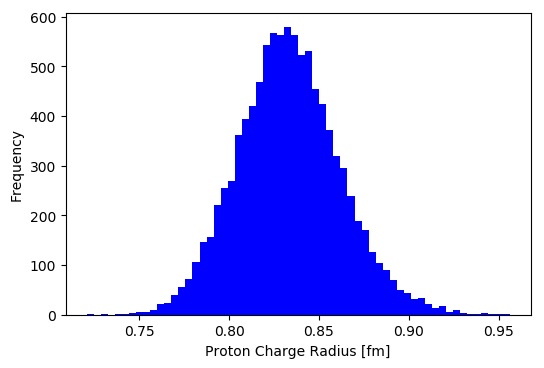

Mean: 0.02177 fm
Median: 0.01992 fm
σ: 0.05988 fm
Iterations: 10000


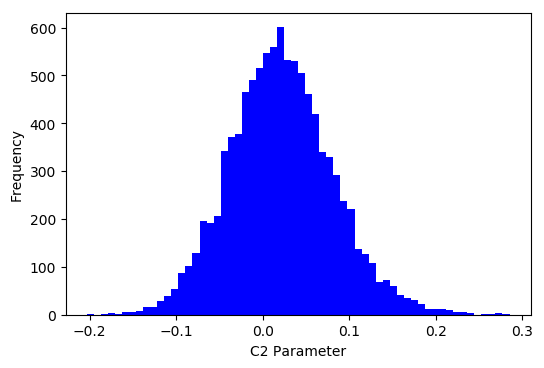

Mean: 26.29945 fm
Median: 26.16004 fm
σ: 4.18313 fm
Iterations: 10000


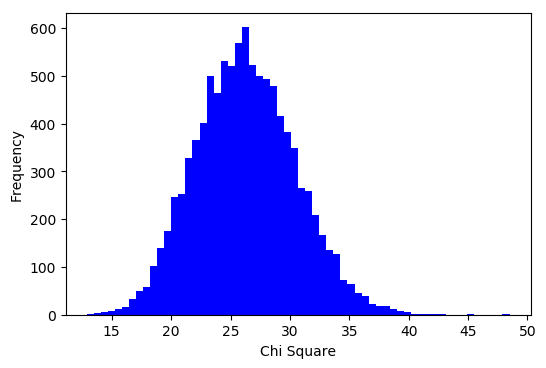

Mean: 0.99661 fm
Median: 0.99658 fm
σ: 0.00258 fm
Iterations: 10000


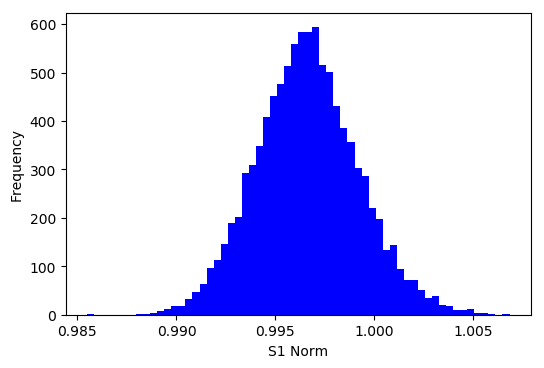

Mean: 0.99746 fm
Median: 0.99744 fm
σ: 0.00206 fm
Iterations: 10000


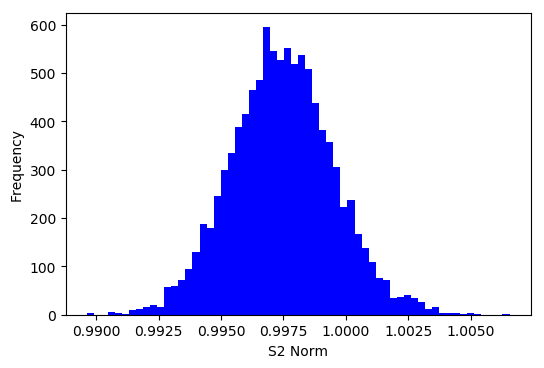

Mean: 0.9967 fm
Median: 0.99647 fm
σ: 0.00215 fm
Iterations: 10000


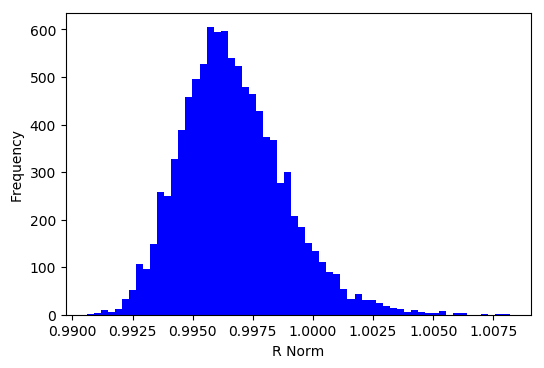

Mean: 0.98896 fm
Median: 0.98894 fm
σ: 0.00243 fm
Iterations: 10000


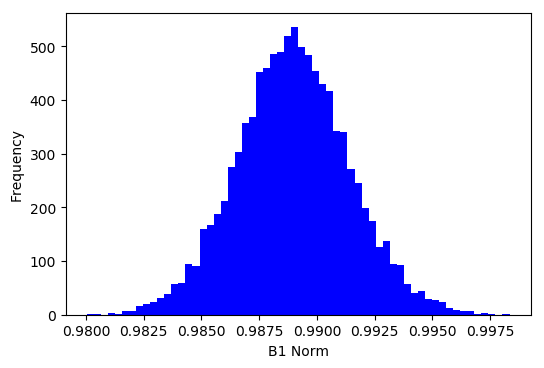

Mean: 0.98745 fm
Median: 0.98741 fm
σ: 0.00245 fm
Iterations: 10000


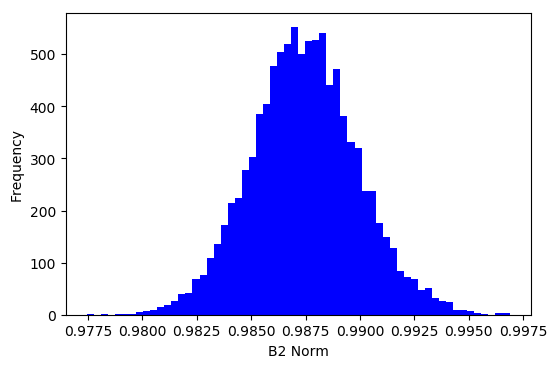

Mean: 0.99725 fm
Median: 0.99714 fm
σ: 0.00221 fm
Iterations: 10000


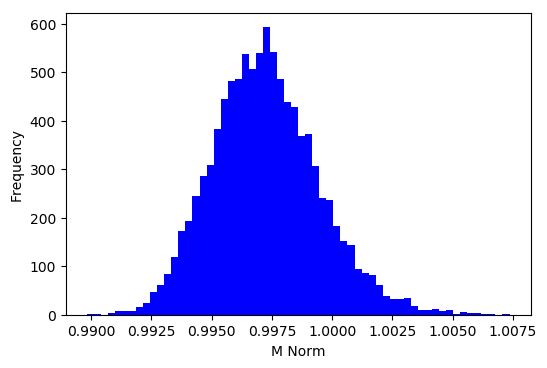

In [11]:
#Graph First Time
%matplotlib inline

##Function Storage
def float_norms(Boot_Q2,c1,c2,ns1,ns2,nr,nb1,nb2,nm):
    f1= ns1*(1+c1*S1_List+(c2*S1_List**2))
    f2= ns2*(1+c1*S2_List+(c2*S2_List**2))
    f3= nr* (1+c1*R_List+(c2*R_List**2))
    f4= nb1*(1+c1*B1_List+(c2*B1_List**2))
    f5= nb2*(1+c1*B2_List+(c2*B2_List**2))
    f6= nm* (1+c1*M_List+(c2*M_List**2))
    return np.concatenate((f1,f2,f3,f4,f5,f6))
def float_rational(Boot_Q2,ns1,ns2,nr,nb1,nb2,nm,c1,c2):
    f1= ns1*((1+(S1_List*c1))/(1+(S1_List*c2)))
    f2= ns2*((1+(S2_List*c1))/(1+(S2_List*c2)))
    f3=  nr*((1+(R_List*c1))/(1+(R_List*c2)))
    f4= nb1*((1+(B1_List*c1))/(1+(B1_List*c2)))
    f5= nb2*((1+(B2_List*c1))/(1+(B2_List*c2)))
    f6=  nm*((1+(M_List*c1))/(1+(M_List*c2)))
    return np.concatenate((f1,f2,f3,f4,f5,f6))

##Concatenate Data
Data=np.concatenate((S1,S2,R,B1,B2,M))

############################################################################
##User Input
#Power
Power=1
#Function ()
Function=float_rational
#Coulomb Corrections (1 or 0)
C_Corr=0
############################################################################

##Loop 
#Set Num Loops
Loop=10000
#Initialize Out Loop
Params,X=[],0
while X<(Loop):
    #Initialize In Loop
    Q2,GE,Error,C_Corr,Set_Num=[],[],[],[],[]
    #Bootstrap
    for Z in range(len(Data)):
        Rand_Ele=np.random.randint(0,len(Data))
        Q2=np.append(Q2,Data[Rand_Ele][0])
        GE=np.append(GE,Data[Rand_Ele][1])
        Error=np.append(Error,Data[Rand_Ele][2])
        Coul_Corr=np.append(C_Corr,Data[Rand_Ele][3])
        Set_Num.append(Data[Rand_Ele][4])
    #Coulumb Correction
    if C_Corr==1:
        GE=GE-Coul_Corr
    
    #Separate Data By Set
    S1_List,S2_List,R_List,B1_List,B2_List,M_List=[],[],[],[],[],[]
    S1_Boot_GE,S2_Boot_GE,R_Boot_GE,B1_Boot_GE,B2_Boot_GE,M_Boot_GE=[],[],[],[],[],[]
    S1_Boot_Error,S2_Boot_Error,R_Boot_Error,B1_Boot_Error,B2_Boot_Error,M_Boot_Error=[],[],[],[],[],[]
    for B in range(len(Q2)):
        if Set_Num[B]==1:
            S1_List=np.append(S1_List,Q2[B])
            S1_Boot_GE=np.append(S1_Boot_GE,GE[B])
            S1_Boot_Error=np.append(S1_Boot_Error,Error[B])
        if Set_Num[B]==2:
            S2_List=np.append(S2_List,Q2[B])
            S2_Boot_GE=np.append(S2_Boot_GE,GE[B])
            S2_Boot_Error=np.append(S2_Boot_Error,Error[B])
        if Set_Num[B]==3:
            R_List=np.append(R_List,Q2[B])
            R_Boot_GE=np.append(R_Boot_GE,GE[B])
            R_Boot_Error=np.append(R_Boot_Error,Error[B])
        if Set_Num[B]==4:
            B1_List=np.append(B1_List,Q2[B])
            B1_Boot_GE=np.append(B1_Boot_GE,GE[B])
            B1_Boot_Error=np.append(B1_Boot_Error,Error[B])
        if Set_Num[B]==5:
            B2_List=np.append(B2_List,Q2[B])
            B2_Boot_GE=np.append(B2_Boot_GE,GE[B])
            B2_Boot_Error=np.append(B2_Boot_Error,Error[B])
        if Set_Num[B]==6:
            M_List=np.append(M_List,Q2[B])
            M_Boot_GE=np.append(M_Boot_GE,GE[B])
            M_Boot_Error=np.append(M_Boot_Error,Error[B])
    Boot_Q2=np.concatenate((S1_List,S2_List,R_List,B1_List,B2_List,M_List))
    Boot_GE=np.concatenate((S1_Boot_GE,S2_Boot_GE,R_Boot_GE,B1_Boot_GE,B2_Boot_GE,M_Boot_GE))
    Boot_Error=np.concatenate((S1_Boot_Error,S2_Boot_Error,R_Boot_Error,B1_Boot_Error,B2_Boot_Error,M_Boot_Error))

    #Check to Make Sure Each Set Does Not Have Zero Entries
    if len(S1_List)==0 or len(S2_List)==0 or len(R_List)==0 or len(B1_List)==0 or len(B2_List)==0 or len(M_List)==0:
        continue
        
    ##Regression
    #Parameters
    params=Parameters()
    params.add('c1',  value=-0.12,vary=1)
    params.add('c2',  value=random.gauss(0.014,0.00),vary=1)
    params.add('ns1', value=1,vary=1)
    params.add('ns2', value=1,vary=1)
    params.add('nr',  value=1,vary=1)
    params.add('nb1', value=1,vary=1)
    params.add('nb2', value=1,vary=1)
    params.add('nm',  value=1,vary=1)

    #Create Model
    model=Model(Function)
    result=model.fit(Boot_GE,Boot_Q2=Boot_Q2,params=params,weights=1/Boot_Error)
    #Save Params to List
    Mini_List=[]
    for name, par in result.params.items():
        Param=round(par.value,5)
        Mini_List.append(Param)
    Mini_List.append(result.chisqr)
    Params.append(Mini_List)
    X+=1
    
#Print One to Test (Testing Purposes)
if Function==float_rational:
    print('Radius:',round((((6*(Mini_List[1]-Mini_List[0]))**2)**0.25),5))
else:
    print('Radius:',round((((-6*Mini_List[0])**2)**0.25),5))
print(result.fit_report())

##Plot 
#Separate Data
c1,c2,ns1,ns2,nr,nb1,nb2,nm,chisqr=[],[],[],[],[],[],[],[],[]
for x in range(Loop):
    c1=np.append(c1,Params[x][0])
    c2=np.append(c2,Params[x][1])
    ns1=np.append(ns1,Params[x][2])
    ns2=np.append(ns2,Params[x][3])
    nr=np.append(nr,Params[x][4])
    nb1=np.append(nb1,Params[x][5])
    nb2=np.append(nb2,Params[x][6])
    nm=np.append(nm,Params[x][7])
    chisqr=np.append(chisqr,Params[x][8])
##Plot
if Function==float_rational:
    c1=(((6*(c2-c1))**2)**0.25)
else:
    c1=(((-6*c1)**2)**0.25)

params_list=[c1,c2,chisqr,ns1,ns2,nr,nb1,nb2,nm]
x_axis=['Proton Charge Radius [fm]','C2 Parameter','Chi Square','S1 Norm','S2 Norm','R Norm','B1 Norm','B2 Norm','M Norm']
def Analyze_Graph(Name,X_Axis,X):
    new_data=(Name)#-np.mean(Name))
    print('Mean:',round(np.mean(Name),5),'fm')
    print('Median:',round(np.median(Name),5),'fm')
    print('\u03C3:',round(np.std(Name),5),'fm')
    print('Iterations:',len(Name))
    #Plotting
    plt.figure(dpi=100)
    plt.hist(new_data,bins=60,color='blue')
    plt.ylabel('Frequency')
    plt.xlabel(X_Axis)
    plt.show()
for x in range(0,len(params_list)):
    Analyze_Graph(params_list[x],x_axis[x],x)